In [1]:
import numpy as np
from itertools import product


# By Kaggle Course Contributor For Computer Vision.
def show_kernel(kernel, label=True, digits=None, text_size=28):
    # Format kernel
    kernel = np.array(kernel)
    if digits is not None:
        kernel = kernel.round(digits)

    # Plot kernel
    cmap = plt.get_cmap('Blues_r')
    plt.imshow(kernel, cmap=cmap)
    plt.title("Filter")
    rows, cols = kernel.shape
    thresh = (kernel.max()+kernel.min())/2
    # Optionally, add value labels
    if label:
        for i, j in product(range(rows), range(cols)):
            val = kernel[i, j]
            color = cmap(0) if val > thresh else cmap(255)
            plt.text(j, i, val, 
                     color=color, size=text_size,
                     horizontalalignment='center', verticalalignment='center')
    plt.xticks([])
    plt.yticks([])

In [2]:
from keras.layers import Conv2D
from keras.layers import MaxPool2D
from keras.models import Sequential
from keras.layers import Flatten
from keras.layers import Dense
import tensorflow as tf

## 1.Detailed CNN

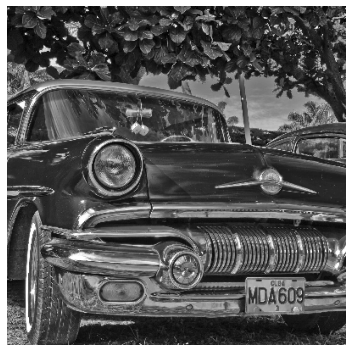

In [3]:
# Let's have a look at an image of one of the classes.

import matplotlib.pyplot as plt
plt.rc('figure',autolayout=True)
plt.rc('axes' , labelweight='bold' , labelsize='large' , 
       titleweight='bold',titlesize=18,titlepad=10)
plt.rc('image',cmap='magma')


image_path = '../input/multiclassimagedatasetairplanecar/Dataset/train/cars/cars203.jpg'
image = tf.io.read_file(image_path)
image = tf.io.decode_jpeg(image, channels=1)
image = tf.image.resize(image, size=[400, 400])

plt.figure(figsize=(5, 5))
plt.imshow(tf.squeeze(image),cmap='gray')
plt.axis('off')
plt.show()

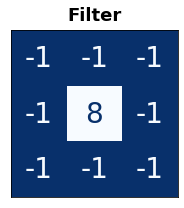

In [4]:
kernel = tf.constant([
    [-1, -1, -1],
    [-1,  8, -1],
    [-1, -1, -1],
])


plt.figure(figsize=(3,3))
show_kernel(kernel)                                           #Code For show_kernel contributed by Kaggle Course Creator.

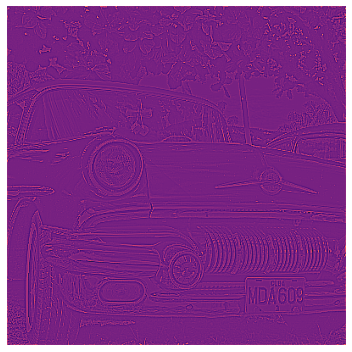

In [5]:
image = tf.image.convert_image_dtype(image, dtype=tf.float32)
image = tf.expand_dims(image, axis=0)
kernel = tf.reshape(kernel, [*kernel.shape, 1, 1])
kernel = tf.cast(kernel, dtype=tf.float32)

image_filter = tf.nn.conv2d(
    input=image,
    filters=kernel,
    strides=1,
    padding='SAME'
)

plt.figure(figsize=(5, 5))
plt.imshow(tf.squeeze(image_filter))
plt.axis('off')
plt.show()

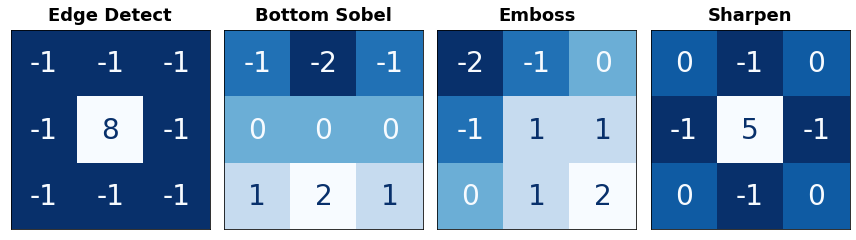

In [6]:
# You can also impport kernels from computer_vision tools

import learntools.computer_vision.visiontools as visiontools
from learntools.computer_vision.visiontools import edge, bottom_sobel, emboss, sharpen

kernels = [edge, bottom_sobel, emboss, sharpen]
names = ["Edge Detect", "Bottom Sobel", "Emboss", "Sharpen"]

plt.figure(figsize=(12, 12))
for i, (kernel, name) in enumerate(zip(kernels, names)):
    plt.subplot(1, 4, i+1)
    visiontools.show_kernel(kernel)
    plt.title(name)
plt.tight_layout()

*** > NOTE : the sum of the numbers in the kernel determines how bright the final image is**

## **CONVOLUTION AND RELU(Detecting Features)**

In [7]:
images = []
for i in range(len(kernels)):
    k1 = kernels[i]
    image = tf.image.convert_image_dtype(image, dtype=tf.float32)
    image = tf.expand_dims(image, axis=0)
    k1 = tf.reshape(k1, [*k1.shape, 1, 1])
    k1 = tf.cast(k1, dtype=tf.float32)
    image_filter = tf.nn.conv2d(
        input=image,
        filters=k1,
        strides=1,
        padding='SAME'
    )
    images.append(tf.squeeze(image_filter))

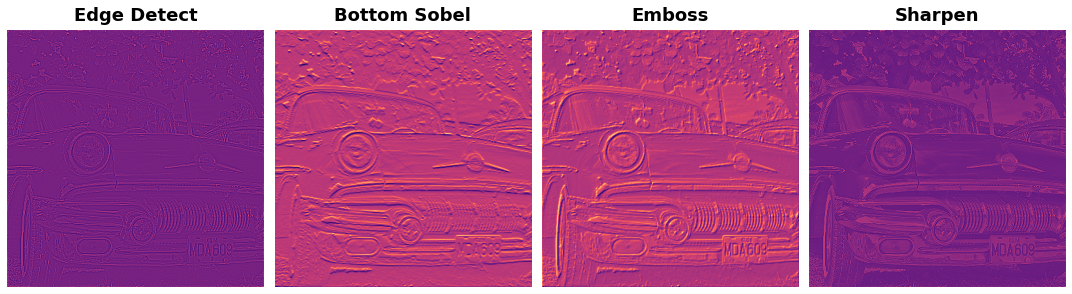

In [8]:
plt.figure(figsize=(15, 15))
for i, (image, name) in enumerate(zip(images, names)):
    plt.subplot(1, 4, i+1)
    plt.imshow(images[i])
    plt.axis('off')
    plt.title(name)

In [9]:
relu_images = []
for i in range(len(kernels)):
    k1 = kernels[i]
    image = tf.image.convert_image_dtype(image, dtype=tf.float32)
    image = tf.expand_dims(image, axis=0)
    k1 = tf.reshape(k1, [*k1.shape, 1, 1])
    k1 = tf.cast(k1, dtype=tf.float32)
    image_filter = tf.nn.conv2d(
        input=image,
        filters=k1,
        strides=1,
        padding='SAME'
    )
    relu_fn = tf.nn.relu
    image_detect = relu_fn(image_filter)
    relu_images.append(tf.squeeze(image_detect))
    
plt.figure(figsize=(15, 15))
for i, (image, name) in enumerate(zip(relu_images, names)):
    plt.subplot(1, 4, i+1)
    plt.imshow(relu_images[i])
    plt.axis('off')
    plt.title(name)

InvalidArgumentError: input must be 4-dimensional[1,400,400] [Op:Conv2D]

## MAX-POOLING | Full Process

In [ ]:
kernel = kernels[0]  #Edge Detect


image_path = '../input/multiclassimagedatasetairplanecar/Dataset/train/cars/cars203.jpg'
image = tf.io.read_file(image_path)
image = tf.io.decode_jpeg(image, channels=1)
image = tf.image.resize(image, size=[400, 400])

image = tf.image.convert_image_dtype(image , dtype=tf.float32)
image = tf.expand_dims(image, axis=0)
kernel = tf.reshape(kernel, [*kernel.shape,1,1])
kernel = tf.cast(kernel,dtype = tf.float32)

image_filter = tf.nn.conv2d(
    input = image,
    filters = kernel,
    strides = 1,
    padding = "VALID"
)

image_detect = tf.nn.relu(image_filter)

image_condense = tf.nn.pool(
    input = image_detect,
    window_shape = (2,2),
    pooling_type = "MAX",
    strides = (2,2),
    padding = "SAME"
)

plt.figure(figsize=(12,7))
plt.subplot(151)
plt.imshow(tf.squeeze(image),cmap='gray')
plt.axis("off")
plt.title("Input")

kernel = kernels[0]
plt.subplot(1,5,2)
visiontools.show_kernel(kernel)
plt.axis("off")
plt.title("Edge Detect")

plt.subplot(153)
plt.imshow(tf.squeeze(image_filter))
plt.axis("off")
plt.title("Filtered")

plt.subplot(154)
plt.imshow(tf.squeeze(image_detect))
plt.axis("off")
plt.title("Detect")

plt.subplot(155)
plt.imshow(tf.squeeze(image_condense))
plt.axis("off")
plt.title("Pooling")
plt.show();



In [ ]:
kernel = kernels[2]  #Emboss


image_path = '../input/multiclassimagedatasetairplanecar/Dataset/train/cars/cars203.jpg'
image = tf.io.read_file(image_path)
image = tf.io.decode_jpeg(image, channels=1)
image = tf.image.resize(image, size=[400, 400])

image = tf.image.convert_image_dtype(image , dtype=tf.float32)
image = tf.expand_dims(image, axis=0)
kernel = tf.reshape(kernel, [*kernel.shape,1,1])
kernel = tf.cast(kernel,dtype = tf.float32)

image_filter = tf.nn.conv2d(
    input = image,
    filters = kernel,
    strides = 1,
    padding = "VALID"
)

image_detect = tf.nn.relu(image_filter)

image_condense = tf.nn.pool(
    input = image_detect,
    window_shape = (2,2),
    pooling_type = "MAX",
    strides = (2,2),
    padding = "SAME"
)

plt.figure(figsize=(12,7))
plt.subplot(151)
plt.imshow(tf.squeeze(image),cmap='gray')
plt.axis("off")
plt.title("Input")

kernel = kernels[2]
plt.subplot(1,5,2)
visiontools.show_kernel(kernel)
plt.axis("off")
plt.title("Emboss")

plt.subplot(153)
plt.imshow(tf.squeeze(image_filter))
plt.axis("off")
plt.title("Filtered")

plt.subplot(154)
plt.imshow(tf.squeeze(image_detect))
plt.axis("off")
plt.title("Detect")

plt.subplot(155)
plt.imshow(tf.squeeze(image_condense))
plt.axis("off")
plt.title("Pooling")
plt.show();



# 2.Building A Model

In [10]:
import tensorflow as tf
from keras.preprocessing import image_dataset_from_directory

data_train = image_dataset_from_directory(
    '../input/multiclassimagedatasetairplanecar/Dataset/train',
    labels = "inferred",
    label_mode = "categorical",
    image_size = [128 , 128],
    interpolation = 'nearest',
    batch_size = 64,
    shuffle = True
)

data_valid = image_dataset_from_directory(
    '../input/multiclassimagedatasetairplanecar/Dataset/test',
    labels = "inferred",
    label_mode = "categorical",
    image_size = [128 , 128],
    interpolation = 'nearest',
    batch_size = 64,
    shuffle = False
)

def convert_to_float(image , label):
    image = tf.image.convert_image_dtype(image,dtype=tf.float32)
    return image,label
    

Found 3000 files belonging to 3 classes.
Found 582 files belonging to 3 classes.


In [11]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPool2D
from keras.layers import Flatten
from keras.layers import Dense

In [12]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,        
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(
    rescale=1./255
)

train_set = train_datagen.flow_from_directory(
    '../input/multiclassimagedatasetairplanecar/Dataset/train',
    target_size = (128,128),
    batch_size = 32,
    class_mode = "categorical"
    

)

test_set = test_datagen.flow_from_directory(
    '../input/multiclassimagedatasetairplanecar/Dataset/test',
    target_size = (128,128),
    batch_size = 32,
    class_mode = "categorical"
    

)

Found 3000 images belonging to 3 classes.
Found 582 images belonging to 3 classes.


In [13]:
import keras.layers.experimental.preprocessing as preprocessing
import tensorflow as tf

model = Sequential()

model.add(Conv2D(filters=32 , kernel_size=5 ,input_shape=[128,128,3] ,activation="relu" ,padding="SAME"))
model.add(MaxPool2D())

model.add(Conv2D(filters=64 , kernel_size=3 ,activation="relu" ,padding="SAME"))
model.add(MaxPool2D())

model.add(Conv2D(filters=128 , kernel_size=3 ,activation="relu" ,padding="SAME"))
model.add(MaxPool2D())

model.add(Flatten())
model.add(Dense(units=6 , activation="relu"))
model.add(Dense(units=3 , activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 32768)             0

In [14]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

history = model.fit(
    train_set,
    validation_data = test_set,
    epochs = 30
)

Epoch 1/30
94/94 [==============================] - 117s 1s/step - loss: 1.1015 - accuracy: 0.3415 - val_loss: 1.0985 - val_accuracy: 0.3436
Epoch 2/30
94/94 [==============================] - 105s 1s/step - loss: 1.0987 - accuracy: 0.3269 - val_loss: 1.0986 - val_accuracy: 0.3436
Epoch 3/30
94/94 [==============================] - 104s 1s/step - loss: 1.0986 - accuracy: 0.3426 - val_loss: 1.0986 - val_accuracy: 0.3436
Epoch 4/30
94/94 [==============================] - 105s 1s/step - loss: 1.0987 - accuracy: 0.3107 - val_loss: 1.0986 - val_accuracy: 0.3436
Epoch 5/30
94/94 [==============================] - 105s 1s/step - loss: 1.0986 - accuracy: 0.3312 - val_loss: 1.0986 - val_accuracy: 0.3316
Epoch 6/30
94/94 [==============================] - 107s 1s/step - loss: 1.0986 - accuracy: 0.3408 - val_loss: 1.0986 - val_accuracy: 0.3436
Epoch 7/30
94/94 [==============================] - 104s 1s/step - loss: 1.0987 - accuracy: 0.3275 - val_loss: 1.0987 - val_accuracy: 0.3247
Epoch 8/30
94

In [15]:
model.save('Scratch1.h5')

<AxesSubplot:>

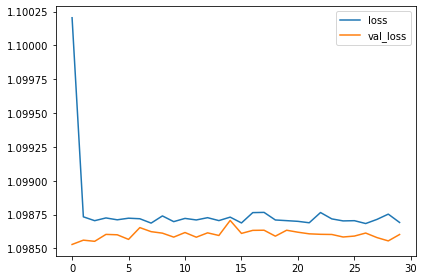

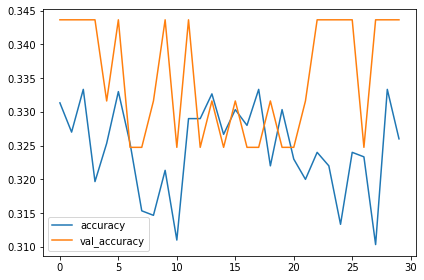

In [16]:
import pandas as pd
history_frame = pd.DataFrame(history.history)
history_frame.loc[:,['loss','val_loss']].plot()
history_frame.loc[:,['accuracy','val_accuracy']].plot()


[[0.33318916 0.33330852 0.33350226]]
SHIP
[[0 0 0]]


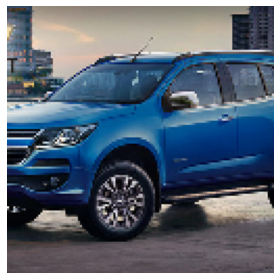

In [22]:
from tensorflow.keras.preprocessing import image
import tensorflow as tf
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = image.load_img('../input/multiclassimagedatasetairplanecar/Dataset/test/cars/cars1.jpg' , target_size=(128,128))
plt.imshow(img)
plt.axis('off')
plt.plot()
img = np.reshape(img,[1,128,128,3])
img_f = tf.cast(img,tf.float32)
cl = model.predict(img_f)
print(cl)
cl = (cl>0.5).astype("int32")
if cl[0][0]>0.5:
    print("AIRPLANE")
elif cl[0][1]>0.5:
    print("CAR")
else:
    print("SHIP")
print(cl)
